# Exercise sheet 3

## Task 3.1

a.) Proof the following identity
$$
\begin{align}
Z=HXH
\end{align}
$$

Proof:
$$
\begin{align}
HXH&=\frac{1}{2}\left[X+Z\right]X\left[X+Z\right]=\left[XX+ZX\right]\left[X+Z\right] \\ 
&=\frac{1}{2}\left[\left(\left|0\right>\left<1\right|+\left|1\right>\left<0\right|\right)\left(\left|0\right>\left<1\right|+\left|1\right>\left<0\right|\right)
+ \left(\left|0\right>\left<0\right|-\left|1\right>\left<1\right|\right)\left(\left|0\right>\left<1\right|+\left|1\right>\left<0\right|\right)\right]
\left[X+Z\right] \\
&=\frac{1}{2}\left[\left|0\right>\left<0\right|+\left|1\right>\left<1\right|+\left|0\right>\left<1\right|-\left|1\right>\left<0\right|\right]\left[\left|0\right>\left<1\right|+\left|1\right>\left<0\right|+\left|0\right>\left<0\right|-\left|1\right>\left<1\right|\right] \\
&=\frac{1}{2}\left[\left|0\right>\left<1\right|+\left|0\right>\left<0\right|+\left|1\right>\left<0\right|-\left|1\right>\left<1\right|+\left|0\right>\left<0\right|-\left|0\right>\left<1\right|-\left|1\right>\left<1\right|-\left|1\right>\left<0\right|\right] \\
&=\frac{1}{2}\left[2\left|0\right>\left<0\right|-2\left|1\right>\left<1\right|\right]=Z
\end{align}
$$


Alternative Proof: Last semester we proved the following identity for Pauli matrices:
$$ X^2 = Y^2 = Z^2 = -iXYZ = I$$
From the last equation, we see: 
$$ iY = -XZ$$ 
But by definition of Pauli matrices we also have
$$iY = ZX$$
so 
$$ZX = -XZ$$
This implies 
$$ ZXZ = -XZ^2 = -X$$
Thus
$$
\begin{align}
HXH&=\frac{1}{2}\left[X+Z\right]X\left[X+Z\right] \\
     &=\frac{1}{2}\left[X^3+X^2Z+ZX^2+ZXZ\right] \\
     &=\frac{1}{2}\left[X + 2Z + ZXZ\right] \\
     &=\frac{1}{2}\left[X + 2Z - X \right] = Z
\end{align}
$$

b.) Proof circuit identity

Proof: We now from Task 1.1 that $H$ is involutory, i.e., $HH=I$
$$
\begin{align}
RHS\hat =& \left[I\otimes H\right]\cdot CX\cdot \left[I\otimes H\right] \\
=&\left[I\otimes H\right]\cdot\left[\left|0\right>\left<0\right|\otimes I+\left|1\right>\left<1\right|\otimes X\right]\cdot\left[I\otimes H\right] \\
=&\left[\left|0\right>\left<0\right|\otimes H+\left|1\right>\left<1\right|\otimes HX\right]\cdot\left[I\otimes H\right] \\
=&\left[\left|0\right>\left<0\right|\otimes \overbrace{HH}^{=I}+\left|1\right>\left<1\right|\otimes \overbrace{HXH}^{=Z}\right] \\
=&\left[\left|0\right>\left<0\right|\otimes I+\left|1\right>\left<1\right|\otimes Z\right]=CZ\hat =LHS
\end{align}
$$

## Task 3.2

Operator $A$ (quantum Bayesian network) from Task 2.3

In [1]:
import numpy as np
from qiskit import Aer, transpile
from qiskit import QuantumCircuit
from qiskit import QuantumRegister
from qiskit import ClassicalRegister
from qiskit.circuit.library.standard_gates import *
from qiskit.visualization import plot_histogram

In [2]:
thtX1 = 2 * np.arcsin(np.sqrt(0.25))
thtY1X1 = 2 * np.arcsin(np.sqrt(0.70))
thtY1X0 = 2 * np.arcsin(np.sqrt(0.60))
thtZ1Y1X1 = 2 * np.arcsin(np.sqrt(0.90))
thtZ1Y1X0 = 2 * np.arcsin(np.sqrt(0.70))
thtZ1Y0X1 = 2 * np.arcsin(np.sqrt(0.55))
thtZ1Y0X0 = 2 * np.arcsin(np.sqrt(0.10))

In [3]:
qregX = QuantumRegister(1, name='x')
qregY = QuantumRegister(1, name='y')
qregZ = QuantumRegister(1, name='z')

In [4]:
opA = QuantumCircuit(qregX, qregY, qregZ, name='A')
# 1 Ry gate on x
opA.ry(thtX1, qregX)
# 2 controlled Ry gates on y
opA.cry(thtY1X1, control_qubit=qregX, target_qubit=qregY)
opA.x(qregX)
opA.cry(thtY1X0, control_qubit=qregX, target_qubit=qregY)
opA.x(qregX)
# 4 multiple controlled Ry gates on z
opA.mcry(thtZ1Y1X1, [qregX[0], qregY[0]], qregZ[0])
opA.x(qregX)
opA.mcry(thtZ1Y1X0, [qregX[0], qregY[0]], qregZ[0])
opA.x(qregX)
opA.x(qregY)
opA.mcry(thtZ1Y0X1, [qregX[0], qregY[0]], qregZ[0])
opA.x(qregY)
opA.x(qregX)
opA.x(qregY)
opA.mcry(thtZ1Y0X0, [qregX[0], qregY[0]], qregZ[0])
opA.x(qregY)
opA.x(qregX)

In [5]:
qcirc = QuantumCircuit(qregX, qregY, qregZ, name='Bayes net')
qcirc.append(opA, [qregX, qregY, qregZ])
qcirc.measure_all()

In [6]:
simulator = Aer.get_backend('aer_simulator')
def runCircuit(circ, shots=10_000):
    transp = transpile(circ, simulator)
    IBMjob = simulator.run(transp, shots=shots)
    result = IBMjob.result()
    counts = result.get_counts(transp)
    return counts

We want to estimate $P(Y=1|X=1,Z=1)$, thus we define a function for multiple repititions

In [7]:
def quantum_rejection_sampling(circ, N, repetitions=5):
    for _ in range(repetitions):
        counts = runCircuit(circ, shots=N)
        counts_111 = counts['1' + '1' + '1']
        counts_101 = counts['1' + '0' + '1']
        print(counts_111 / (counts_111 + counts_101))

Quantum rejection sampling for $N=100, 200, 10000$

In [8]:
N = 100
quantum_rejection_sampling(qcirc, N)

0.7222222222222222
0.7037037037037037
0.7647058823529411
0.8125
0.6521739130434783


In [9]:
N = 200
quantum_rejection_sampling(qcirc, N)

0.7368421052631579
0.84375
0.7555555555555555
0.8285714285714286
0.8205128205128205


In [10]:
N = 10_000
quantum_rejection_sampling(qcirc, N)

0.7889052528227786
0.7957256461232605
0.7919395465994962
0.7767185148018063
0.7895005096839959


## Task 3.3

Implement operator $S_e$

In [69]:
from qiskit.circuit.library import CCZGate
opSe = QuantumCircuit(3)
# ccz-gate
opSe.h(1)
opSe.mcx([0, 2], 1)
opSe.h(1)
# x-gate
opSe.x(1)
# ccz-gate
opSe.h(1)
opSe.mcx([0, 2], 1)
opSe.h(1)
# x-gate
opSe.x(1)

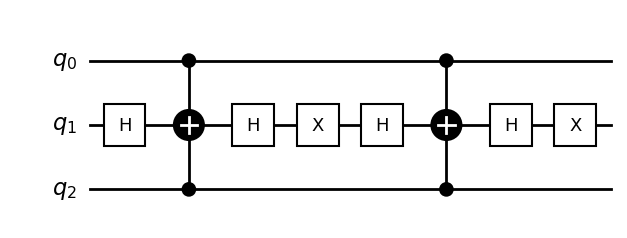

In [68]:
opSe.draw('mpl', style='bw', plot_barriers=False, justify='none', fold=-1)

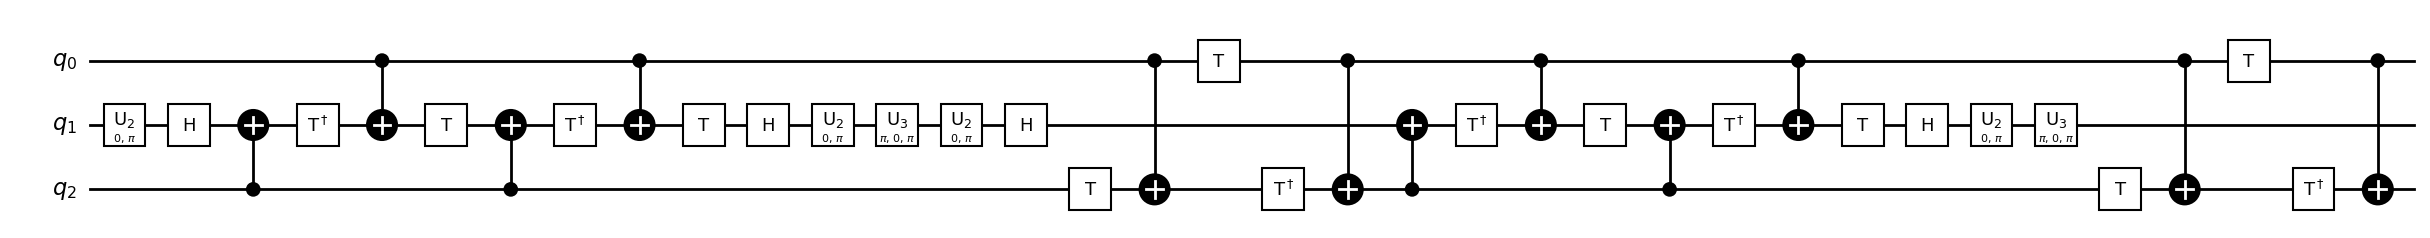

In [81]:
opSe.decompose(reps=1).draw('mpl', style='bw', plot_barriers=False, justify='none', fold=-1)

Qiskit may use this operation for transpiling circuits for real quantum backends, since they have a specific native gate set

## Task 3.4

Grover operator

In [107]:
from qiskit.circuit.library import GroverOperator

opG = GroverOperator(opSe, opA)

Implement circuit

In [120]:
qcircG = QuantumCircuit(qregX, qregY, qregZ, name='Grover Bayes net')
qcircG.append(opA, [qregX, qregY, qregZ])
qcircG.append(opG, [qregX, qregY, qregZ])

qcircG.measure_all()

Rerun quantum rejection sampling for $N=100, 200, 10000$

In [119]:
N = 100
quantum_rejection_sampling(qcircG, N)

0.7755102040816326
0.8865979381443299
0.7525773195876289
0.7551020408163265
0.7894736842105263


In [115]:
N = 200
quantum_rejection_sampling(qcircG, N)

0.7864583333333334
0.7708333333333334
0.8229166666666666
0.8051282051282052
0.7731958762886598


In [116]:
N = 10_000
quantum_rejection_sampling(qcircG, N)

0.7932463227677646
0.7927107061503417
0.7938496583143508
0.7893700787401575
0.8004551567187338
